# 维纳滤波

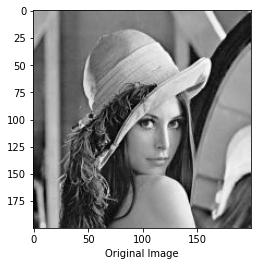

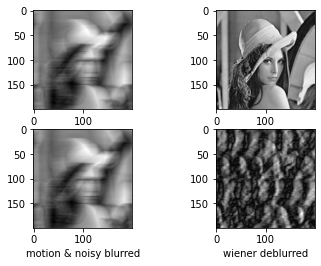

In [1]:
from PIL import Image
import matplotlib.pyplot as ppt
import numpy

# 仿真运动模糊
def motion_process(len, size):
    sx, sy = size
    PSF = numpy.zeros((sy, sx))
    PSF[int(sy / 2):int(sy /2 + 1), int(sx / 2 - len / 2):int(sx / 2 + len / 2)] = 1
    return PSF / PSF.sum() # 归一化亮度

def make_blurred(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps
    blurred = numpy.fft.ifft2(input_fft * PSF_fft)
    blurred = numpy.abs(numpy.fft.fftshift(blurred))
    return blurred

def wiener(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps #噪声功率，这是已知的，考虑epsilon
    result = numpy.fft.ifft2(input_fft / PSF_fft) #计算F(u,v)的傅里叶反变换
    result = numpy.abs(numpy.fft.fftshift(result))
    return result

image = Image.open('img/lena.jpg').convert('L')
ppt.figure(1)
ppt.xlabel("Original Image")
ppt.gray()
ppt.imshow(image)

ppt.figure(2)
ppt.gray()
data = numpy.asarray(image.getdata()).reshape(image.size)
PSF = motion_process(30, data.shape)
blurred = numpy.abs(make_blurred(data, PSF, 1e-3))

ppt.subplot(221)
ppt.xlabel("Motion blurred")
ppt.imshow(blurred)

result = wiener(blurred, PSF, 1e-3)
ppt.subplot(222)
ppt.xlabel("wiener deblurred")
ppt.imshow(result)

blurred += 0.04 * blurred.std() * numpy.random.standard_normal(blurred.shape)

ppt.subplot(223)
ppt.xlabel("motion & noisy blurred")
ppt.imshow(blurred)

result = wiener(blurred, PSF, 0.1 + 1e-3)
ppt.subplot(224)
ppt.xlabel("wiener deblurred")
ppt.imshow(result)

ppt.show()
